In [1]:
import ppscore as pps
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import (f1_score, roc_auc_score, precision_recall_curve, 
                            roc_curve, plot_confusion_matrix, classification_report, 
                            accuracy_score)
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

import joblib
from warnings import filterwarnings
filterwarnings("ignore")

# Integrantes:
## Miguel Angel Viloria Sierra - CC: 1066528471
## Jader Barrera Escudero - CC: 1067949142
## Carlos Obed Gómez Macea - CC: 10965868
## Luis Miguel yances - CC: 1067927356
## Diana milena leon arteaga - CC: 1063150398
## Luis Gabriel Quiceno Espitia - CC: 1067940814

# Analísis Exploratoría de Datos

En este Notebook se analizarán los datos encontrados en un dataset con el nombre Vehiculos_Colombia.csv, que según la investigación que se realizo, el dataset proviene de una plataforma llamada Fasecolda la cual es una prestadora de seguros, por ende, podemos asumir que el dataset nos mostrara datos con respecto a los vehiculos de la aseguradora para así ilustrar o visionar un modelo preliminar de Machine Learning para predecir lo que hallemos en este analísis.


# Carga y Validación de Datos

En este segmento se cargará los datos del dataset y se validan ciertos elementos a saber:

- Que no haya datos faltantes
- Que todos los datos sean coherentes con las variables

In [2]:
#Se cargan y presentan los datos
df=pd.read_csv("./Vehiculos_Colombia.csv")
pd.set_option('display.max_columns', None)
df

,Novedad,Marca,Clase,Codigo,HomologoCodigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,Servicio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Importado,Potencia,TipoCaja,Cilindraje,Nacionalidad,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria
0,M,ALEKO,AUTOMOVIL,101001,NaN,2141,1.6,MT 1600CC TAXI,1380,2,Publico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12200,15300,1,82,MT,1570,RUS,5,0,5,0,2,Activo,GSL,4X2,0,1
1,M,AMERICAN MOTOR,CAMIONETA PASAJ.,206001,NaN,EAGLE,SUMMIT,AT 2400CC LX 4P,0,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6100,6500,7000,7500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43800,54800,1,0,AT,2351,NaN,5,0,5,0,2,Activo,NaN,NaN,0,1
2,M,AMERICAN MOTOR,CAMPERO,208003,NaN,WRANGLER,4.2,MT 4200CC CAB,1100,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11900,12800,13700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81600,102000,1,120,MT,2400,USA,5,0,3,1,2,Activo,NaN,4X4,0,1
3,M,AMERICAN MOTOR,CAMPERO,208004,NaN,WRANGLER,4.2,MT 2500CC CARPADO,1100,1,Particular,0,0,0,0,0,0,0,0,4600,4900,5300,5700,6100,6500,7000,7500,8100,8700,9300,10000,10700,11500,12300,13200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74900,93600,1,120,MT,2400,USA,5,0,3,1,2,Activo,NaN,4X4,0,1
4,M,AUTECO,MOTOCICLETA,317003,NaN,SUMA,80,MT 80CC 2T,75,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,260,280,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2800,3200,0,6,MT,80,COL,2,0,0,0,2,Activo,GSL,2X1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12428,N,STÄRKER,MOTOCICLETA,40017004,NaN,SUNNY,1200 W,ELEC,98,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4200,0,4200,5300,1,2,NaN,0,CHI,2,0,0,0,2,Activo,ELT,2X1,0,1
12429,N,SCOMADI,MOTOCICLETA,40117001,NaN,TURISMO LEGGERA,125,AT 125,100,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11000,11000,13800,1,9,AT,125,ENG,2,0,0,0,2,Activo,GSL,2X1,0,1
12430,N,HAOJUE,MOTOCICLETA,40217001,NaN,LUCKY SPORTS,HJ 110-3,AT 110CC,107,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4600,4600,5800,1,7,AT,107,CHI,2,0,0,0,2,Activo,GSL,2X1,0,1
12431,N,HAOJUE,MOTOCICLETA,40217002,NaN,COOL,HJ 150-9,MT 150CC,138,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4300,0,4800,6000,1,11,MT,149,CHI,2,0,0,0,2,Activo,GSL,2X1,0,1


In [3]:
#Verificamos los datos nulos en el dataset
df.isnull().sum()

Novedad               0
Marca                 0
Clase                 0
Codigo                0
HomologoCodigo    12433
                  ...  
Estado                0
Combustible         726
Transmision         700
Um                    0
PesoCategoria         0
Length: 76, dtype: int64

Se notan que tenemos varios datos nulos en las columnas HomologoCodigo, TipoCaja, Combustible, Nacionalidad y Transmision.
Entonces se buscarán formas para manejar esos datos nulos.

Se puede eliminar la columna de HomologoCodigo ya que esta columna en todos sus campos son datos nulos(NaN), por ende, no aporta nada al modelo a futuro.

In [4]:
#Eliminar columna HomologoCodigo
del(df['HomologoCodigo'])
df.head()

,Novedad,Marca,Clase,Codigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,Servicio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Importado,Potencia,TipoCaja,Cilindraje,Nacionalidad,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria
0,M,ALEKO,AUTOMOVIL,101001,2141,1.6,MT 1600CC TAXI,1380,2,Publico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12200,15300,1,82,MT,1570,RUS,5,0,5,0,2,Activo,GSL,4X2,0,1
1,M,AMERICAN MOTOR,CAMIONETA PASAJ.,206001,EAGLE,SUMMIT,AT 2400CC LX 4P,0,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6100,6500,7000,7500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43800,54800,1,0,AT,2351,NaN,5,0,5,0,2,Activo,NaN,NaN,0,1
2,M,AMERICAN MOTOR,CAMPERO,208003,WRANGLER,4.2,MT 4200CC CAB,1100,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11900,12800,13700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81600,102000,1,120,MT,2400,USA,5,0,3,1,2,Activo,NaN,4X4,0,1
3,M,AMERICAN MOTOR,CAMPERO,208004,WRANGLER,4.2,MT 2500CC CARPADO,1100,1,Particular,0,0,0,0,0,0,0,0,4600,4900,5300,5700,6100,6500,7000,7500,8100,8700,9300,10000,10700,11500,12300,13200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74900,93600,1,120,MT,2400,USA,5,0,3,1,2,Activo,NaN,4X4,0,1
4,M,AUTECO,MOTOCICLETA,317003,SUMA,80,MT 80CC 2T,75,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,260,280,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2800,3200,0,6,MT,80,COL,2,0,0,0,2,Activo,GSL,2X1,0,1


In [5]:
#A continuación se revisa los datos de la columna TipoCaja
df['TipoCaja'].unique()

array(['MT', 'AT', 'TP', nan], dtype=object)

In [6]:
#Revisión de la columna Combustible
df['Combustible'].unique()

array(['GSL', nan, 'DSL', 'ELT', 'HBD', 'GAS'], dtype=object)

In [7]:
df['Nacionalidad'].unique()

array(['RUS', nan, 'USA', 'COL', 'IND', 'JAP', 'TWN', 'MEX', 'RUM', 'KOR',
       'ALE', 'BRA', 'HNG', 'ITA', 'SUE', 'ECU', 'VEN', 'CAN', 'CHI',
       'TAI', 'CHL', 'FRA', 'ESP', 'ARG', 'CZE', 'ENG', 'IDN', 'AUS',
       'NED'], dtype=object)

In [8]:
df['Transmision'].unique()

array(['4X2', nan, '4X4', '2X1', '3X1', '6X4', '6x4', '4x2', '8X4', '3X2',
       '6X6', '6X2'], dtype=object)

In [9]:
#Procedemos a veficar cuantos datos vacios tienen las columnas antes mencionadas
df[['TipoCaja','Combustible','Nacionalidad','Transmision']].isnull().sum()

TipoCaja        390
Combustible     726
Nacionalidad     76
Transmision     700
dtype: int64

Podemos observar que para en estos casos la mejor forma de manejar los datos es imputandolos.

In [10]:
#Imputación de datos
# Como estos datos son tipo object por ende son String se utilizara la moda para este caso

df['TipoCaja'] = df['TipoCaja'].fillna(df['TipoCaja'].mode()[0])
df['Combustible'] = df['Combustible'].fillna(df['Combustible'].mode()[0])
df['Nacionalidad'] = df['Nacionalidad'].fillna(df['Nacionalidad'].mode()[0])
df['Transmision'] = df['Transmision'].fillna(df['Transmision'].mode()[0])

In [11]:
#Comprobamos los datos
df[['TipoCaja','Combustible','Nacionalidad','Transmision']].isnull().sum()

TipoCaja        0
Combustible     0
Nacionalidad    0
Transmision     0
dtype: int64

In [12]:
#Volvemos a verificar si el dataset tiene datos nulos
df.isnull().sum()

Novedad          0
Marca            0
Clase            0
Codigo           0
Referencia1      0
                ..
Estado           0
Combustible      0
Transmision      0
Um               0
PesoCategoria    0
Length: 75, dtype: int64

In [13]:
#Para las variables categoricas y binarias del dataset, la verificación de que no hayan elementos mal escritos o similar.
#Para esto, se imprimen los valores únicos de cada variable
variables_=[ 'Marca', "Clase", "Novedad", "TipoCaja","Nacionalidad","Combustible","Transmision","Importado","AireAcondicionado","Um"]
[ (i, df[i].unique()) for i in variables_]

[('Marca',
  array(['ALEKO', 'AMERICAN MOTOR', 'AUTECO', 'AROCARPATI', 'ASIA', 'AUDI',
         'AUTOCAR', 'BMW', 'DINA', 'BUICK', 'CAGIVA', 'CADILLAC', 'CORCEL',
         'CHEVROLET', 'CHRYSLER', 'CITROEN', 'DACIA', 'DAEWOO', 'DAIHATSU',
         'DERBI', 'DODGE', 'DUCATI', 'FIAT', 'FREIGHTLINER', 'FORD',
         'MOTO GUZZI', 'HYUNDAI', 'HARLEY DAVIDSON', 'HONDA', 'IFA',
         'INTERNATIONAL', 'HINO', 'ISUZU', 'JAWA', 'JAGUAR', 'JEEP',
         'KAMAZ', 'KENWORTH', 'KAWASAKI', 'KIA', 'KRAZ', 'LADA', 'MARMON',
         'LANCIA', 'HYOSUNG', 'LAND ROVER', 'MORINI', 'MACK', 'MAZDA',
         'MERCEDES BENZ', 'MINI', 'MERCURY', 'MG', 'MITSUBISHI', 'NISSAN',
         'PEGASO', 'OLTCIT', 'PEUGEOT', 'PAZ', 'PIAGGIO', 'BEIJING',
         'PONTIAC', 'PORSCHE', 'RENAULT', 'SCANIA', 'SEAT', 'SSANGYONG',
         'SISU', 'SKODA', 'SUBARU', 'SUZUKI', 'TAVRIA', 'TOYOTA', 'UAZ',
         'VOLKSWAGEN', 'VOLGA', 'VOLVO', 'WESTERN STAR', 'YUGO', 'YAMAHA',
         'TATA', 'KYMCO', 'IVECO', 'AGRALE'

&nbsp;
Se pueden observar que las variables y sus datos estan bien escritos. Ahora se procede a verificar varios datos estadísticos con respecto a los dtos del dataset usando la función **describe()**.
&nbsp;

In [14]:
df.describe()

,Codigo,Peso,IdServicio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Importado,Potencia,Cilindraje,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Um,PesoCategoria
count,1.243300e+04,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.00000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,1.243300e+04,12433.000000,1.243300e+04,1.243300e+04,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000
mean,8.406562e+06,1777.958015,1.226253,38.888442,50.859809,55.026140,72.848870,82.803024,86.653261,92.260114,100.474544,117.504223,134.277326,211.791201,209.758707,232.868173,257.212258,271.152578,330.082040,393.966862,445.798279,521.414783,580.143167,730.127081,814.888603,1024.264457,1276.396686,1480.47012,1752.597925,1755.222392,2119.256012,2211.691466,2321.862785,2501.681010,2771.043192,3263.728786,3792.323655,4591.963323,5477.313601,6794.499316,7796.331537,9096.765061,8432.478887,8195.447599,9933.559881,11420.373200,12368.696212,12199.927612,14772.605164,1.361666e+04,12813.431995,8.599155e+04,1.063156e+05,0.840666,134.683021,2584.716319,4.555055,2394.048420,2.951983,0.550068,2.048580,0.033942,1.045041
std,8.257674e+06,2152.615612,0.418421,748.805754,868.556571,920.438342,1084.171113,1188.044579,1224.174105,1292.572880,1375.557837,1497.622366,1618.104386,2036.133032,2036.295733,2173.735256,2338.936720,2478.578669,2798.410446,3263.603975,3580.373154,3901.986849,4203.311351,4746.645913,4911.180435,5516.352270,6039.931253,6678.68568,7406.390439,7683.574512,8518.512940,8932.374079,9569.137443,10439.631424,11123.754916,12324.425167,13458.054824,15275.653879,17089.570013,21497.228645,21859.059202,24132.523557,24695.246048,26080.217752,29818.371017,33203.324001,36103.221723,37675.793778,45310.776119,4.899490e+04,49525.622290,8.567971e+04,1.065270e+05,0.366002,96.166467,2308.234051,4.982099,6774.820501,1.770366,0.497507,0.288488,0.181087,0.719219
min,1.010010e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.400000e+03,1.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.201240e+06,268.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.560000e+04,4.380000e+04,1.000000,80.000000,1339.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000
50%,6.201016e+06,1355.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

De estos datos mostrados en el dataframe se puede observar que:
1. Los datos estan muy desbalanceados con respecto a sus columnas de al lado.
2. En las columnas de las fechas, faltan datos significativos en la serie de tiempo.
3. Se observa que las columnas Potencia y Cilindraje varían con respecto a los datos de los fechas.
4. Se obversa que al transcurrir los años datos tienen valor 0, lo que hace que se afecta la predicción de en el modelo de serie de tiempo.

Debido a una investigación hecha por nuestro grupo de trabajo, se llego a la conclusión que los datos de las columnas de fechas son precios del valor vehículo, por ende se puede asumir que los valores(0) en las registros en las columnas se da porque o no se importo o se construyeron vehículos en esos años.

Por ende, lo que podemos predecir del dataset son los precios de venta de vehículos en años proximos usando las columnas de fechas pero realizando agrupaciones pequeñas de categorías para tener datos continuos en el tiempo, como tal se puede asumir que el modelo preeliminar a usar un modelo de Serie de Tiempo.

# Analísis profundo de los datos.

Teniendo en cuenta el analisis anterior profundizaremos en algunas columnas para verificar la logica que tiene el dataset.

Se revisará a mayor profundidad los datos para detectar ciertas interacciones y guiar la futura interpretación de los modelos.

Para ello, se revisarán interacciones, agrupaciones y visualizaciones de los datos, y se generarán ideas del algunas interacciones interesantes que se detecten.

1. Al agrupar los datos por alguna de sus variables, se observa que alguna otra tiene un nivel diferente.
2. Generar algunos heatmaps y otras gráficas para apoyar las posibles observaciones.

In [15]:
df.groupby('Clase').mean()

,Codigo,Peso,IdServicio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Importado,Potencia,Cilindraje,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Um,PesoCategoria
Clase,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AUTOMOVIL,5.692188e+06,1110.998489,1.039295,2.216625,3.788413,5.937028,13.438287,10.722922,11.161209,16.521411,18.760705,22.309824,33.662469,40.534005,50.181360,81.972292,71.853904,78.853904,94.959698,132.068010,159.153652,166.775819,161.833753,241.622166,311.881612,574.060453,785.755668,792.881612,993.284635,1021.649874,1173.138539,1324.030227,1306.498741,1388.740554,1575.768262,1824.005038,2090.201511,2402.720403,3200.377834,3964.534005,3780.377834,4835.239295,5512.947103,5266.901763,6569.748111,7492.317380,8360.730479,8151.183879,9355.314861,8823.375315,8877.707809,76829.672544,95657.732997,0.875063,144.122670,1983.599496,4.844584,0.028967,3.995718,0.825693,2.000000,0.030730,1.212594
BUS / BUSETA / MICROBUS,8.902432e+06,2642.526839,1.811133,17.495030,18.687873,20.079523,21.471173,23.061630,24.850895,26.640159,28.429423,30.616302,44.333996,103.180915,128.031809,136.978131,146.719682,211.332008,294.831014,376.540755,420.477137,467.395626,625.844930,798.608350,1062.226640,1163.220676,1668.389662,2490.059642,2771.172962,2677.534791,3801.192843,4076.143141,4498.608350,5599.801193,6990.258449,8195.228628,8924.652087,10690.656064,12018.290258,15581.908549,17123.658052,18961.630219,18153.479125,19054.274354,23280.914513,25517.892644,24541.948310,28170.178926,34045.328032,32592.842942,25739.761431,157847.117296,191668.389662,0.805169,153.421471,4499.238569,22.568588,2238.938370,2.568588,0.262425,2.003976,0.025845,0.369781
CAMION,9.718466e+06,2979.810345,1.812500,178.663793,229.525862,248.922414,328.017241,346.336207,365.517241,385.560345,406.896552,515.086207,545.258621,783.836207,738.793103,785.991379,954.741379,1070.474138,1166.379310,1157.112069,1250.646552,1406.465517,1534.913793,2000.862069,2178.448276,2574.568966,3172.844828,3741.163793,4146.120690,3945.043103,4555.818966,4571.551724,4769.612069,4885.991379,4539.655172,5626.293103,6623.491379,8176.939655,8823.922414,10545.474138,13527.155172,15100.646552,12012.068966,10913.793103,12965.086207,15548.922414,17418.965517,15334.482759,18868.965517,13600.431034,15064.870690,97908.836207,120300.000000,0.812500,140.551724,4229.670259,2.308190,5250.547414,2.163793,0.273707,2.090517,0.023707,0.252155
CAMIONETA PASAJ.,7.735930e+06,1438.865609,1.029215,0.000000,0.000000,0.000000,0.000000,2.003339,2.838063,3.088481,4.590985,4.924875,10.350584,20.200334,31.803005,48.247078,45.275459,40.358932,59.983306,60.993322,93.230384,106.761269,151.419032,246.327212,360.601002,518.447412,772.787980,831.302170,1080.550918,1195.659432,1490.484140,1558.764608,1704.590985,1661.686144,2000.333890,2317.779633,2352.420701,3029.966611,3482.888147,3070.450751,3306.343907,4259.432387,4071.953255,4568.781302,5188.647746,5848.998331,7061.185309,9847.996661,13086.560935,15952.587646,19852.671119,84816.444073,105904.924875,0.965776,158.271285,2462.818865,6.085977,12.332220,4.836394,0.885643,1.989983,0.066778,1.638564
CAMIONETA REPAR,1.018001e+07,1200.134969,1.312883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.122699,76.073620,152.760736,342.944785,361.349693,598.159509,625.153374,844.785276,866.871166,1015.337423,1595.705521,1784.662577,1379.754601,2175.460123,2700.000000,4382.822086,5026.993865,6003.067485,5244.785276,5902.453988,6229.447853,8600.613497,12086.503067,13506.134969,15370.552147,12665.030675,60395.705521,75657.668712,0.993865,94.165644,1830.521472,2.392638,493.024540,4.331288,0.478528,2.000000,0.08589

<AxesSubplot:xlabel='Marca'>

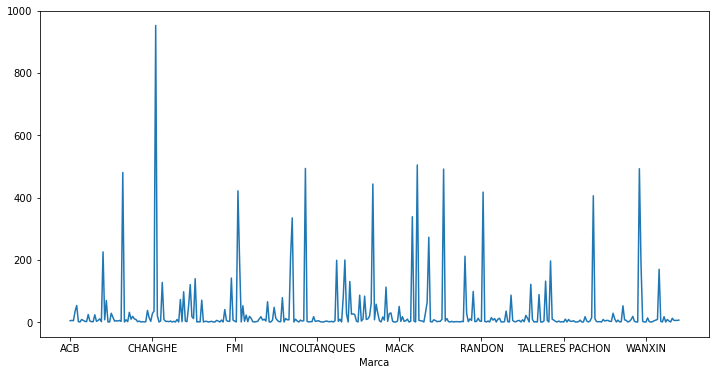

In [16]:
df.groupby('Marca')['Peso'].count().plot(figsize=(12,6))

Se observa que los promedios de los precios de los vehículos en respecto a los años varian de una manera desbalanceada tanto asi que hay años donde no hay un promedio dato para dichos veículos. 


In [17]:
df.groupby('Importado').mean()

,Codigo,Peso,IdServicio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Potencia,Cilindraje,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Um,PesoCategoria
Importado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,8.455781e+06,2833.976275,1.412418,58.303887,66.956083,74.543160,78.950025,84.805654,93.972741,97.405351,101.650681,112.761232,133.200404,420.524987,455.340737,493.311459,531.660777,605.068147,677.995962,751.181222,833.472993,887.925290,1006.845028,1122.145381,1321.711257,1526.456335,1904.724886,1914.336194,2031.892983,1860.858152,2553.619384,2197.70318,2663.124685,2822.064614,2479.106512,2753.306411,3315.719334,4058.112065,4619.131752,6608.929833,8123.089349,9349.934377,7860.055528,6768.021201,8235.638566,10362.140333,10258.707723,10714.386673,12569.409389,14981.019687,14948.662292,67515.749621,77644.876325,86.554266,2173.755679,3.691570,7881.507320,2.096921,0.222615,2.126704,0.064109,0.635538
1,8.397233e+06,1577.807597,1.190968,35.208573,47.809032,51.327019,71.692499,82.423460,85.265978,91.284922,100.251626,118.403176,134.481439,172.229238,163.212782,183.505549,205.195178,207.864524,264.140834,326.262916,372.321087,451.948909,499.269039,655.826636,718.828932,929.082472,1157.307692,1398.238136,1699.662266,1735.200918,2036.929774,2214.34271,2257.182357,2440.957711,2826.374856,3360.470723,3882.655951,4693.145809,5639.967470,6829.670876,7734.400115,9048.781095,8540.972063,8465.992155,10255.372178,11620.943360,12768.608879,12481.486797,15190.183697,13358.065442,12408.735170,89493.331420,111749.665136,143.805013,2662.606965,4.718714,1353.993303,3.114045,0.612132,2.033773,0.028224,1.122656


<AxesSubplot:xlabel='Marca'>

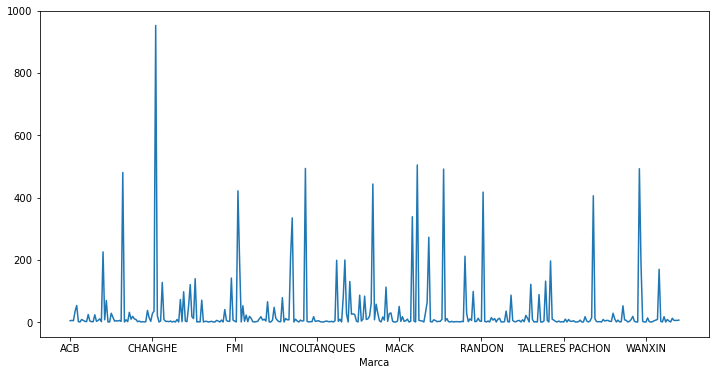

In [18]:
df.groupby('Marca')['Importado'].count().plot(figsize=(12,6))

Con respecto a los promedios de se puede observar un amuento en sus números con respecto a los años, tanto para vehículos importados como para los no importados, estos datos pueden estar muy correlacionados con el precio del vehículo.

In [19]:
df.groupby(['Clase','Potencia']).mean()

Codigo         Peso  IdServicio        1970  \
Clase     Potencia                                                      
AUTOMOVIL 0         6.439369e+06   179.212766     1.06383  142.553191   
          17        8.001168e+06   375.000000     1.00000    0.000000   
          36        1.170100e+07   645.000000     1.00000    0.000000   
          38        8.001010e+06   700.000000     1.00000    0.000000   
          40        1.110100e+07   720.000000     1.00000    0.000000   
...                          ...          ...         ...         ...   
VOLQUETA  420       2.247600e+07     0.000000     2.00000    0.000000   
          427       5.426082e+06  7467.000000     2.00000    0.000000   
          428       5.826006e+06  8130.000000     2.00000    0.000000   
          440       8.776004e+06  4525.000000     2.00000    0.000000   
          460       8.126004e+06     0.000000     2.00000    0.000000   

                         1971       1972       1973        1974       1975  \
Clase     Potencia                                                           
AUTOMOVIL 0         27.659574  29.787234   52.12766   34.042553  36.170213   
          17         0.000000   0.000000    0.00000    0.000000   0.000000   
          36         0.000000   0.000000    0.00000    0.000000   0.000000   
          38         0.000000   0.000000  600.00000  640.000000   0.000000   
          40         0.000000   0.000000    0.00000    0.000000   0.000000   
...                       ...        ...        ...         ...        ...   
VOLQUETA  420        0.000000   0.000000    0.00000    0.000000   0.000000   
          427        0.000000   0.000000    0.00000    0.000000   0.000000   
          428        0.000000   0.000000    0.00000    0.000000   0.000000   
          440        0.000000   0.000000    0.00000    0.000000   0.000000   
          460        0.000000   0.000000    0.00000    0.000000   0.000000   

                         1976       1977        1978       1979        1980  \
Clase     Potencia                                                            
AUTOMOVIL 0         38.297872  63.829787  168.085106  97.234043  228.510638   
          17         0.000000   0.000000    0.000000   0.000000    0.000000   
          36         0.000000   0.000000    0.000000   0.000000    0.000000   
          38         0.000000   0.000000    0.000000   0.000000    0.000000   
          40         0.000000   0.000000    0.000000   0.000000    0.000000   
...                       ...        ...         ...        ...         ...   
VOLQUETA  420        0.000000   0.000000    0.000000   0.000000    0.000000   
          427        0.000000   0.000000    0.000000   0.000000    0.000000   
          428        0.000000   0.000000    0.000000   0.000000    0.000000   
          440        0.000000   0.000000    0.000000   0.000000    0.000000   
          460        0.000000   0.000000    0.000000   0.000000    0.000000   

                          1981        1982        1983        1984  \
Clase     Potencia                                                   
AUTOMOVIL 0         289.787234  276.595745  178.723404  255.319149   
          17          0.000000    0.000000    0.000000    0.000000   
          36          0.000000    0.000000    0.000000    0.000000   
          38          0.000000    0.000000    0.000000    0.000000   
          40          0.000000    0.000000    0.000000    0.000000   
...                        ...         ...         ...         ...   
VOLQUETA  420         0.000000    0.000000    0.000000    0.000000   
          427         0.000000    0.000000    0.000000    0.000000   
          428         0.000000    0.000000    0.000000    0.000000   
          440         0.000000    0.000000    0.000000    0.000000   
          460         0.000000    0.000000    0.000000    0.000000   

                          1985        1986        1987        1988  \
Clase     Potencia                                  

<AxesSubplot:xlabel='Marca'>

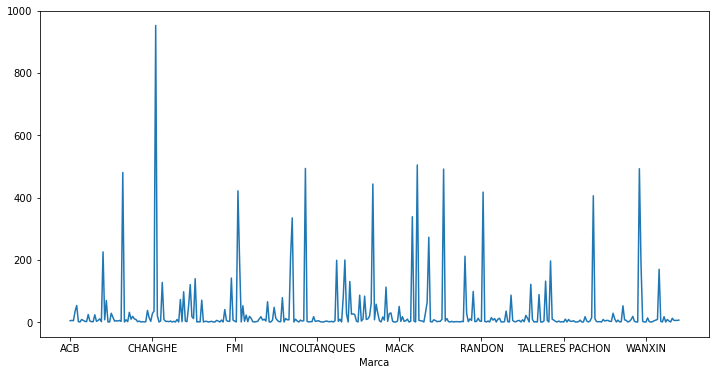

In [20]:
df.groupby('Marca')['Potencia'].count().plot(figsize=(12,6))

Se observa que dependendiendo de las potencias las clases de los vehículos varian por sus precios, pero como se sabe hay muchos 0 en estos datos, los cuales se asume que no hubo vehículos de esa potencia en esos años.

In [21]:
df.groupby(['Clase','Cilindraje']).mean()

Codigo          Peso  IdServicio        1970  \
Clase     Cilindraje                                                       
AUTOMOVIL 0           7.111600e+06    466.578947    1.052632  352.631579   
          660         8.601015e+06    650.000000    1.000000    0.000000   
          796         8.211029e+06    756.000000    1.100000    0.000000   
          798         2.101016e+06    980.000000    1.000000    0.000000   
          799         2.101043e+06    900.000000    2.000000    0.000000   
...                            ...           ...         ...         ...   
VOLQUETA  12920       3.226006e+06  10911.666667    1.666667    0.000000   
          13000       6.776045e+06   4216.500000    2.000000    0.000000   
          14618       2.126004e+06  10650.000000    2.000000    0.000000   
          14860       4.726002e+06  12250.000000    1.000000    0.000000   
          15950       5.826010e+06      0.000000    1.000000    0.000000   

                           1971       1972        1973          1974   1975  \
Clase     Cilindraje                                                          
AUTOMOVIL 0           91.578947  98.421053  155.263158    112.631579  120.0   
          660          0.000000   0.000000    0.000000      0.000000    0.0   
          796          0.000000   0.000000    0.000000      0.000000    0.0   
          798          0.000000   0.000000    0.000000      0.000000    0.0   
          799          0.000000   0.000000    0.000000      0.000000    0.0   
...                         ...        ...         ...           ...    ...   
VOLQUETA  12920        0.000000   0.000000    0.000000      0.000000    0.0   
          13000        0.000000   0.000000    0.000000      0.000000    0.0   
          14618        0.000000   0.000000    0.000000      0.000000    0.0   
          14860        0.000000   0.000000    0.000000      0.000000    0.0   
          15950        0.000000   0.000000    0.000000  24400.000000    0.0   

                            1976        1977        1978        1979  \
Clase     Cilindraje                                                   
AUTOMOVIL 0           127.368421  135.263158  316.842105  202.105263   
          660           0.000000    0.000000    0.000000    0.000000   
          796           0.000000    0.000000    0.000000    0.000000   
          798           0.000000    0.000000    0.000000    0.000000   
          799           0.000000    0.000000    0.000000    0.000000   
...                          ...         ...         ...         ...   
VOLQUETA  12920         0.000000    0.000000    0.000000    0.000000   
          13000         0.000000    0.000000    0.000000    0.000000   
          14618         0.000000    0.000000    0.000000    0.000000   
          14860         0.000000    0.000000    0.000000    0.000000   
          15950         0.000000    0.000000    0.000000    0.000000   

                            1980        1981        1982        1983  \
Clase     Cilindraje                                                   
AUTOMOVIL 0           482.631579  626.842105  545.263158  327.894737   
          660           0.000000    0.000000    0.000000    0.000000   
          796           0.000000    0.000000    0.000000    0.000000   
          798           0.000000    0.000000    0.000000    0.000000   
          799           0.000000    0.000000    0.000000    0.000000   
...                          ...         ...         ...         ...   
VOLQUETA  12920         0.000000    0.000000    0.000000    0.000000   
          13000         0.000000    0.000000    0.000000    0.000000   
          14618         0.000000    0.000000    0.000000    0.000000   
          14860         0.000000    0.000000    0.000000    0.000000   
          15950         0.000000    0.000000    0.000000    0.000000   

                            1984        1985        1986        1987  \
Clase     Cilindraje                                             

<AxesSubplot:xlabel='Marca'>

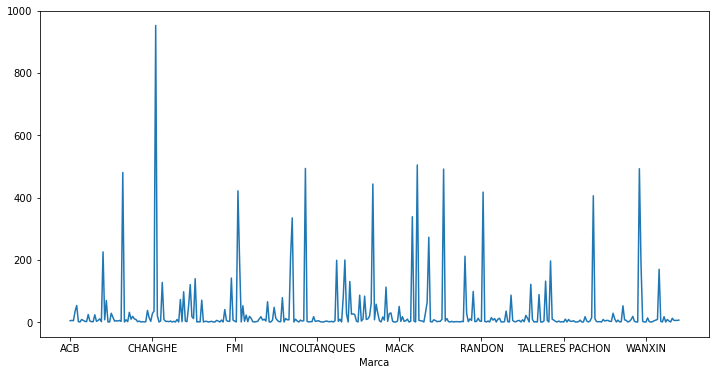

In [22]:
df.groupby('Marca')['Cilindraje'].count().plot(figsize=(12,6))

Se observa que dependendiendo del Cilindraje que el vehículo posea el precio varia, por ende, se puede asumir que el cilindraje afecta el precio de los vehículos.

In [23]:
df.groupby(['Marca','AireAcondicionado']).mean()

,,Codigo,Peso,IdServicio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Importado,Potencia,Cilindraje,CapacidadPasajeros,CapacidadCarga,Puertas,Ejes,Um,PesoCategoria
Marca,AireAcondicionado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACB,0,2.551700e+07,115.400000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1380.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3520.000000,4400.000000,1.000000,10.200000,151.400000,2.000000,0.000000,0.000000,2.0,0.000000,1.000000
ACURA,1,3.440184e+07,1351.333333,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1016.666667,1083.333333,0.0,1000.0,0.0,0.0,2950.0,1833.333333,1966.666667,2116.666667,0.0,0.000000,3783.333333,0.000000,8266.666667,4616.666667,10716.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85133.333333,106433.333333,1.000000,199.833333,2532.833333,5.000000,0.000000,3.833333,2.0,0.000000,1.666667
AG,0,3.461700e+07,128.400000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,640.000000,1802.000000,870.000000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5460.000000,6840.000000,1.000000,14.400000,200.000000,2.000000,0.000000,0.000000,2.0,0.000000,1.000000
AGRALE,0,1.040669e+07,2130.428571,1.828571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,4780.0,10854.285714,12711.428571,13642.857143,14637.142857,15708.571429,11625.714286,14208.571429,17765.714286,20942.857143,26162.857143,17282.857143,10382.857143,0.000000,3588.571429,13557.142857,41314.285714,25628.571429,128622.857143,160794.285714,1.000000,147.142857,4234.857143,16.285714,4735.571429,1.714286,2.0,0.000000,0.000000
AKT,0,1.591739e+07,140.092593,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,27.777778,61.296296,158.333333,257.407407,580.555556,674.074074,679.629630,1120.370370,870.370370,1262.962963,1409.259259,1483.333333,1329.629630,1300.000000,4761.111111,5642.592593,0.333333,11.537037,150.277778,1.870370,47.222222,0.000000,2.0,0.166667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZHONGXING,1,1.152070e+07,1459.200000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1370.000000,13130.000000,12340.000000,6370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38420.000000,48030.000000,1.000000,104.000000,2501.900000,4.400000,185.500000,3.400000,2.0,0.000000,1.500000
ZNA,1,3.700767e+07,2521.666667,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62216.666667,77766.666667,1.000000,140.000000,2953.000000,4.000000,1680.000000,3.00

<AxesSubplot:xlabel='Marca'>

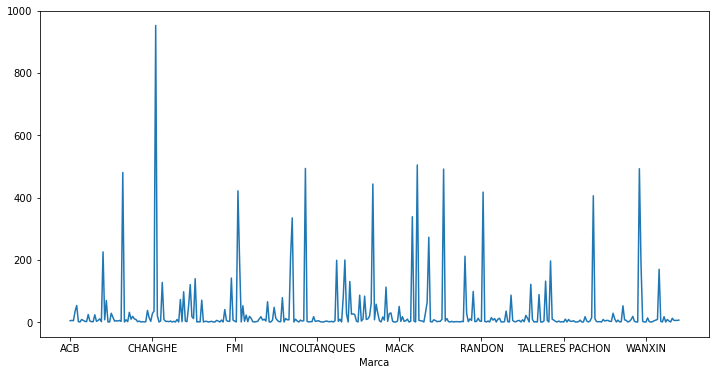

In [24]:
df.groupby('Marca')['Clase'].count().plot(figsize=(12,6))

Aqui se puede apreciar la variedad de vehículos que tiene el dataset, pero en estos datos podemos ver la cantidad de vehículos por marca.

Es interesante ver como las variables que afectan tanto el precio de un vehículo.

A continuación, se trata de graficar los datos, puesto que son mucos datos para distintas columnas es dificil que los gráficos se puedan apreciar de mejor manera.

<AxesSubplot:xlabel='Importado', ylabel='Clase'>

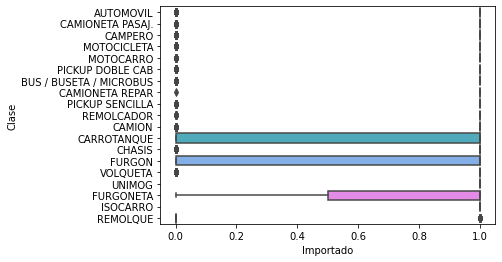

In [25]:
sns.boxplot(y='Clase', x='Importado', data=df)

Se puede observar que los como se ve en el dataset los datos de importación son variados con respecto al tipo de vehículo, aunque se nota que la mayor parte son NO importados.

<AxesSubplot:xlabel='Cilindraje', ylabel='Clase'>

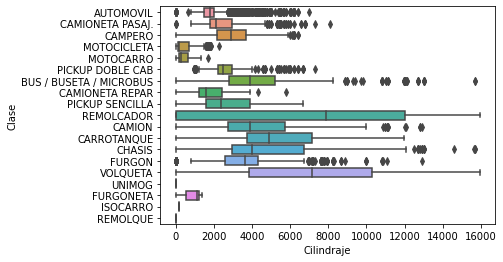

In [26]:
sns.boxplot(y='Clase', x='Cilindraje', data=df)

En este gráfico podemos decir que los vehículos varian por el cilindraje, aparte de que existen bastantes datos outliers o datos atípicos.

<AxesSubplot:xlabel='Potencia', ylabel='Clase'>

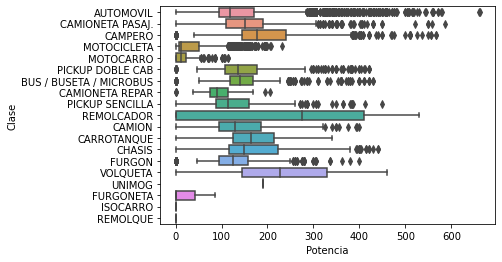

In [27]:
sns.boxplot(y='Clase', x='Potencia', data=df)

La mayor parte de los vehículos se encuentran en el rango de 100 y 300 en potencia, esto puede diferir por el cilindraje o la marca del vehículo, por lo cual afecta el precio o el valor de este ultimo.

<AxesSubplot:xlabel='Potencia', ylabel='Cilindraje'>

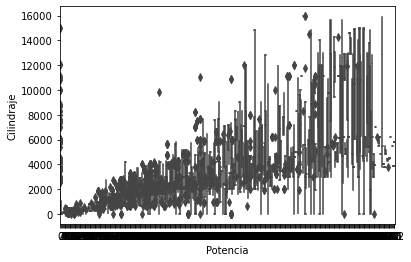

In [28]:
sns.boxplot(y='Cilindraje', x='Potencia', data=df)

Podemos observar que el cilindraje y la potencia estan directamente relacionados y son proporcionales entre sí, por ende, eso podría tomarse como a mayor potencia, mayor es el cilindraje y por lo tanto, el valor del vehículo aumentara.

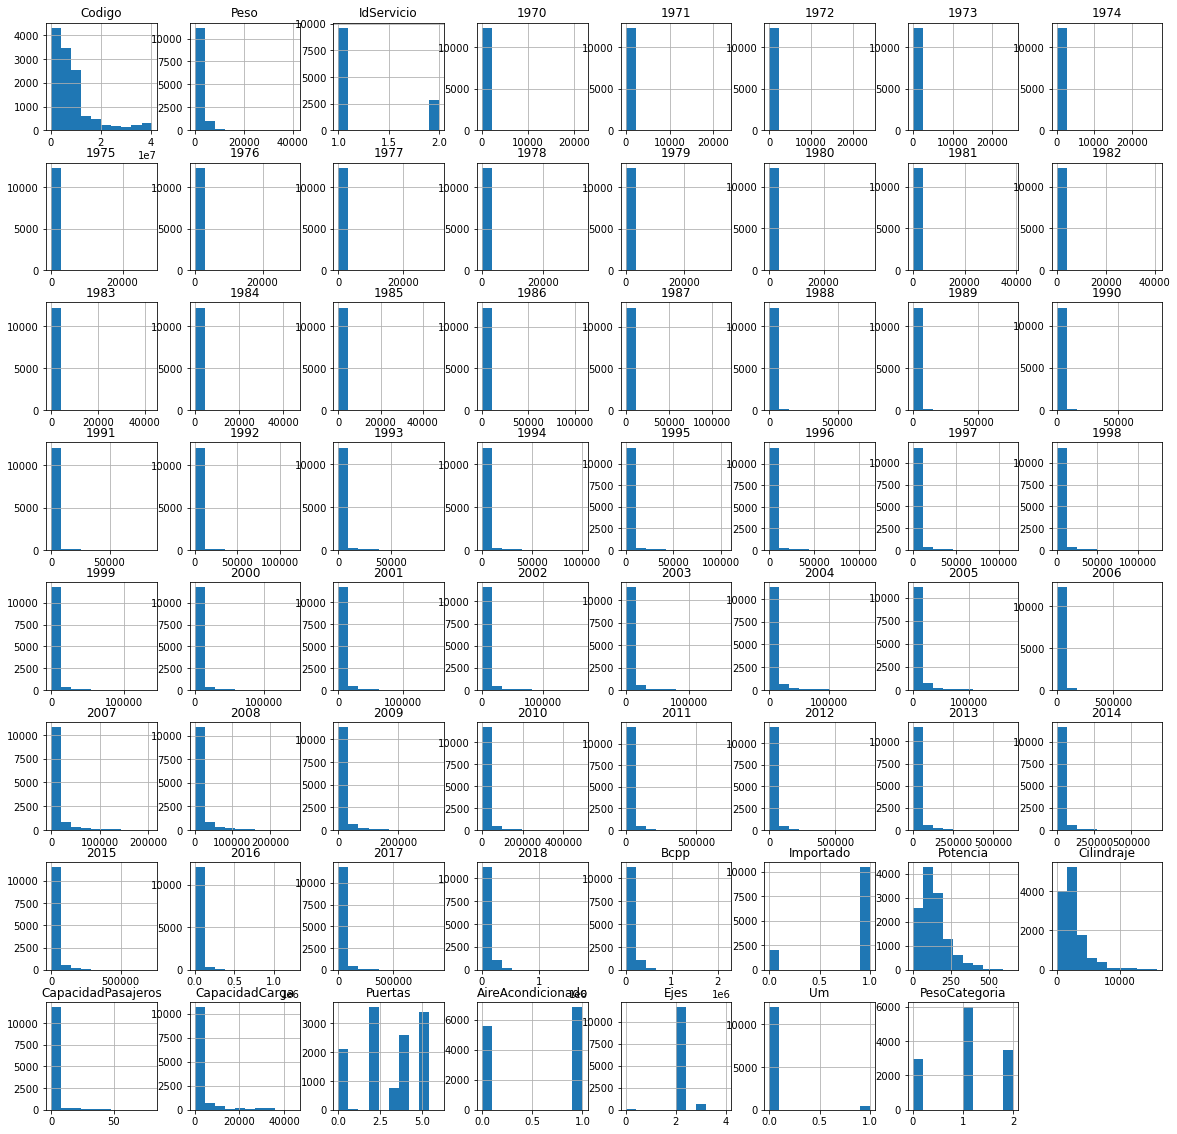

In [29]:
df.hist(figsize=(20,20));

Pasaremos ahora a revisar la correlacionalidad que tiene que tienen las variables con respecto a las otras.
Para eso haremos uso de la función melt con el método de Pearson ya que las columnas de las fechas hara muy extenso el analisis de estas variables.

In [30]:
#Usaremos la función melt para unir todo el dataset con respecto a las fechas y la otra salida es el valor de ese dato
melt_data = df.melt(id_vars=['Novedad','Clase','Marca','Codigo','Referencia1','Referencia2','Referencia3','Peso','IdServicio','Servicio','Bcpp','Importado','Potencia','TipoCaja','Cilindraje','Nacionalidad','CapacidadPasajeros','CapacidadCarga','Puertas','AireAcondicionado','Ejes','Estado','Combustible','Transmision','Um','PesoCategoria'],
                      var_name='Fechas', value_name='valor_modelo').copy()
melt_data.head(10)

,Novedad,Clase,Marca,Codigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,Servicio,Bcpp,Importado,Potencia,TipoCaja,Cilindraje,Nacionalidad,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria,Fechas,valor_modelo
0,M,AUTOMOVIL,ALEKO,101001,2141,1.6,MT 1600CC TAXI,1380,2,Publico,15300,1,82,MT,1570,RUS,5,0,5,0,2,Activo,GSL,4X2,0,1,1970,0
1,M,CAMIONETA PASAJ.,AMERICAN MOTOR,206001,EAGLE,SUMMIT,AT 2400CC LX 4P,0,1,Particular,54800,1,0,AT,2351,COL,5,0,5,0,2,Activo,GSL,4X2,0,1,1970,0
2,M,CAMPERO,AMERICAN MOTOR,208003,WRANGLER,4.2,MT 4200CC CAB,1100,1,Particular,102000,1,120,MT,2400,USA,5,0,3,1,2,Activo,GSL,4X4,0,1,1970,0
3,M,CAMPERO,AMERICAN MOTOR,208004,WRANGLER,4.2,MT 2500CC CARPADO,1100,1,Particular,93600,1,120,MT,2400,USA,5,0,3,1,2,Activo,GSL,4X4,0,1,1970,0
4,M,MOTOCICLETA,AUTECO,317003,SUMA,80,MT 80CC 2T,75,1,Particular,3200,0,6,MT,80,COL,2,0,0,0,2,Activo,GSL,2X1,0,1,1970,0
5,M,MOTOCICLETA,AUTECO,317004,KTZ,100,MT 100CC,78,1,Particular,3300,0,5,MT,100,COL,2,0,0,0,2,Activo,GSL,2X1,0,1,1970,0
6,M,MOTOCICLETA,AUTECO,317006,BAJAJ,PLUS POWER,AT 150CC,95,1,Particular,5500,0,7,AT,150,COL,2,0,0,0,2,Activo,GSL,2X1,0,1,1970,0
7,M,MOTOCICLETA,AUTECO,317007,ZIP,80,AT 80CC,77,1,Particular,3300,0,6,MT,80,COL,2,0,0,0,2,Activo,GSL,2X1,0,1,1970,0
8,M,MOTOCICLETA,AUTECO,317008,KB,125,MT 125CC,93,1,Particular,3100,0,13,MT,125,COL,2,0,0,0,2,Activo,GSL,2X1,0,1,1970,0
9,M,MOTOCICLETA,AUTECO,317009,SUNNY,80,MT 80CC,105,1,Particular,3100,0,6,MT,80,COL,2,0,0,0,2,Activo,GSL,2X1,0,1,1970,0


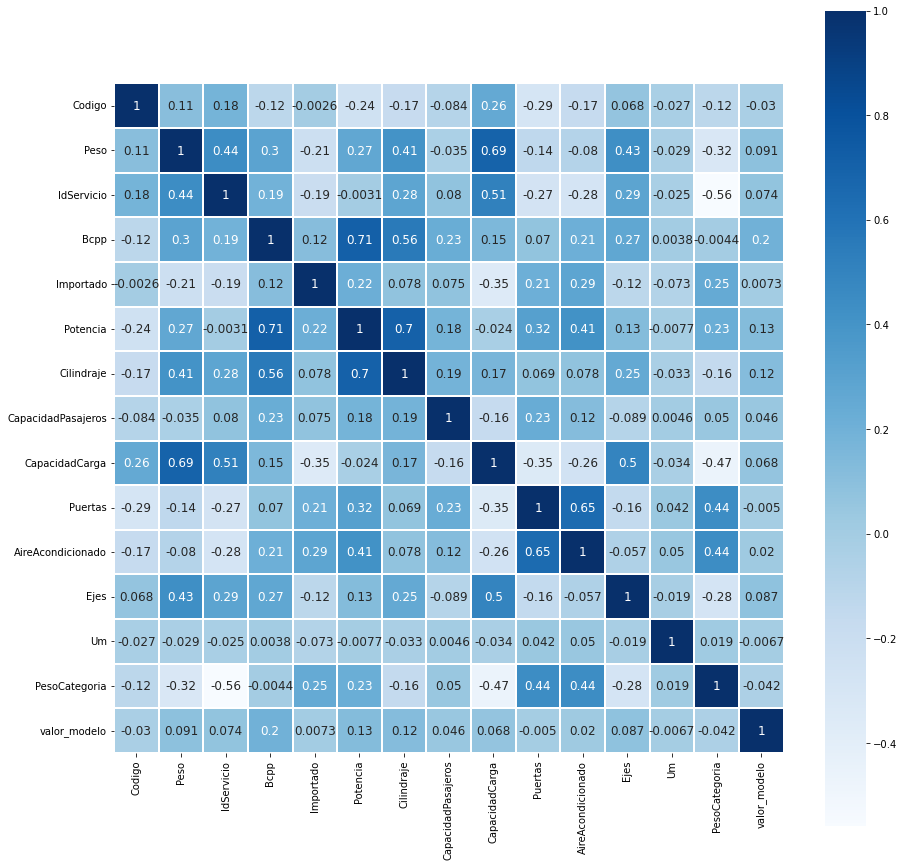

In [31]:
#Uso el metodo corr(heat_df, cmap="Blues",linewidths=0.5, annot=True, fmt='g')
melt_corr = melt_data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(melt_corr, cmap='Blues', annot = True, annot_kws={'size': 12}, square=True, linewidths=0.1);

Estas gráficas parecen apoyar las hipótesis que se han ido formando:


1. La variable que mayor poder predictivo tiene es realmente el precio del vehículo en columnas de fechas el cual es el esta dado en la colmna valor_modelo.
2. Nos permite decir que las variables más relevantes son **Marca, Clase, las fechas(1970,2018),Bcpp, Potencia, y Cilindraje**. Estas son, las variables que directamente  creeemos que tienen poder predictivo sobre la variables respuesta que buscamos

# Preprocesamiento de los Datos.

Se aplica cambios a los datos originales, donde tenemos tanto variables tanto numericas como categorías.

Se probarán inicialmente los modelos:

RandomForestRegression
LinealRegression
KNeighborsRegressor

Para las pruebas iniciales, se hará un split 80-20 para Entrenamiento y Prueba, se tomarán más muestras de la clase minoritaria (upsampling) para manejar la clase no balanceada y se tomará la versión "por defecto" de los modelos en sklearn con todos los features del set de datos.

Para comparar los modelos, se usarán los datos de la matriz de confusión.

El objetivo de este paso es la generación de un insight inicial de que tan buenos predictores para el set de datos son cada uno de los modelos.

Posteriormente, se hará un tuneo de los hiper parámetros de cada modelo. 

Teniendo en cuenta lo descrubrido en el analisis exploratorio, partiremos el dataset para sacar las columnas que requerimos.

In [32]:
df1 = df[['Marca','Clase']].copy()
df1 = df1.join(df.loc[:,'1970':'2018']).copy()
df1 = df1.join(df[['Bcpp','Potencia','Cilindraje','PesoCategoria']]).copy()
df1

,Marca,Clase,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Potencia,Cilindraje,PesoCategoria
0,ALEKO,AUTOMOVIL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12200,15300,82,1570,1
1,AMERICAN MOTOR,CAMIONETA PASAJ.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6100,6500,7000,7500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43800,54800,0,2351,1
2,AMERICAN MOTOR,CAMPERO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11900,12800,13700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81600,102000,120,2400,1
3,AMERICAN MOTOR,CAMPERO,0,0,0,0,0,0,0,0,4600,4900,5300,5700,6100,6500,7000,7500,8100,8700,9300,10000,10700,11500,12300,13200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74900,93600,120,2400,1
4,AUTECO,MOTOCICLETA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,260,280,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2800,3200,6,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12428,STÄRKER,MOTOCICLETA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4200,0,4200,5300,2,0,1
12429,SCOMADI,MOTOCICLETA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11000,11000,13800,9,125,1
12430,HAOJUE,MOTOCICLETA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4600,4600,5800,7,107,1
12431,HAOJUE,MOTOCICLETA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4300,0,4800,6000,11,149,1


Aplicamos la función melt al dataframe para reducir las columnas de los años a uno sola columna.

In [33]:
melt_df1 = df1.melt(id_vars=['Marca','Clase','Bcpp','Potencia','Cilindraje','PesoCategoria'],
                      var_name='Fechas', value_name='Precio_modelo').copy()
melt_df1.head(10)

,Marca,Clase,Bcpp,Potencia,Cilindraje,PesoCategoria,Fechas,Precio_modelo
0,ALEKO,AUTOMOVIL,15300,82,1570,1,1970,0
1,AMERICAN MOTOR,CAMIONETA PASAJ.,54800,0,2351,1,1970,0
2,AMERICAN MOTOR,CAMPERO,102000,120,2400,1,1970,0
3,AMERICAN MOTOR,CAMPERO,93600,120,2400,1,1970,0
4,AUTECO,MOTOCICLETA,3200,6,80,1,1970,0
5,AUTECO,MOTOCICLETA,3300,5,100,1,1970,0
6,AUTECO,MOTOCICLETA,5500,7,150,1,1970,0
7,AUTECO,MOTOCICLETA,3300,6,80,1,1970,0
8,AUTECO,MOTOCICLETA,3100,13,125,1,1970,0
9,AUTECO,MOTOCICLETA,3100,6,80,1,1970,0


In [34]:
melt_df1.shape

(609217, 8)

Como se tienen varios 0 en la columna Precio_modelo, lo que se procede a realizar es un filtro para quitar esos datos de nuestro dataframe.

In [35]:
melt_df1 = melt_df1[melt_df1['Precio_modelo'] !=0]
melt_df1 = melt_df1.dropna()

In [36]:
melt_df1.shape

(63476, 8)

In [37]:
melt_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63476 entries, 2155 to 609216
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Marca          63476 non-null  object
 1   Clase          63476 non-null  object
 2   Bcpp           63476 non-null  int64 
 3   Potencia       63476 non-null  int64 
 4   Cilindraje     63476 non-null  int64 
 5   PesoCategoria  63476 non-null  int64 
 6   Fechas         63476 non-null  object
 7   Precio_modelo  63476 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 4.4+ MB


Revisamos los datos de nuestro dataframe en la columna de Precio_modelo para saber si necesitamos realizar un escalamiento de los datos.

In [38]:
melt_df1['Precio_modelo']

2155        4000
2156        4800
2159        2100
2160        8300
2161        7100
           ...  
609212      4200
609213     11000
609214      4600
609215      4800
609216    100000
Name: Precio_modelo, Length: 63476, dtype: int64

Por lo que vemos, por el momento no se necesita realizar un esacalamiento.

Por ende, haremos unas funciones para partir los datos y usar Onehot para los datos categorícos.

In [39]:
def get_X_y(df, y_name):
 
  y=[y_name]
  X=[col for col in df.columns if col not in y]
  y=df[y].copy().values.flatten()
  X=pd.get_dummies(df[X].copy(),drop_first=True)
  return X, y


def data_preprocessing_up_or_down_sample(X, y, sample="up", test_size=0.2):


  
  a,b=0,0
  if sample=="up": 
    a,b=1,0
  if sample=="down":
    a,b=0,1 

  
  # Apply the normal train_test_split to the data
  X_train, X_test, y_train, y_test = train_test_split( X, y, \
                                        test_size=test_size)
  # Using the a and b local variables, apply downsampling or upsampling only
  # if the sample parameter is "up" or "down".

  if a+b>=1:
    X_train_temp, y_train_temp = resample(X_train[y_train == a],
                                    y_train[y_train == a],
                                    n_samples=X_train[y_train == b].shape[0])
    X_train = np.concatenate((X_train[y_train == b], X_train_temp))
    y_train = np.concatenate((y_train[y_train == b], y_train_temp))
  return (X_train, X_test, y_train, y_test)



Aplicaremos entonces estas funciones.

In [40]:
x,y =  get_X_y(melt_df1, 'Precio_modelo')

In [41]:
 X_train, X_test, y_train, y_test =  data_preprocessing_up_or_down_sample(x, y, sample="1", test_size=0.2)

In [42]:
model = RandomForestRegressor(random_state=42)

In [43]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
y_pred=model.predict(X_test)
y_pred

array([121579.        ,   3245.        ,  29000.        , ...,
        56619.        ,   9088.        ,  32468.16666667])

In [45]:
y_test

array([125100,   3600,  29000, ...,  54400,   8900,  21900], dtype=int64)

In [47]:
# MSE
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))

# R2
print("Metrica de varianza:" ,r2_score(y_test, y_pred)) 

MSE: 76525593.80
Metrica de varianza: 0.9813657209663295


Aplicamos ahora el modelo de LinearRregression

In [48]:
modelL = LinearRegression(fit_intercept=True)
modelL.fit(X_train,y_train)

LinearRegression()

In [49]:
y_predl = modelL.predict(X_test)
y_predl

array([111300.90522965, -19536.83321443,  53373.77283827, ...,
        60055.31252659,   -744.73515014,  30575.16719592])

In [50]:
y_test

array([125100,   3600,  29000, ...,  54400,   8900,  21900], dtype=int64)

In [51]:
# MSE
print("MSE: %.2f" % mean_squared_error(y_test, y_predl))

# R2
print("Metrica de varianza:" ,r2_score(y_test, y_predl)) 

MSE: 283717541030221792.00
Metrica de varianza: -69086321.1572877



A continuación, usaremos KNeighborsRegressor.

In [52]:
modelknn = KNeighborsRegressor()
modelknn.fit(X_train,y_train)

KNeighborsRegressor()

In [53]:
y_predK = modelknn.predict(X_test)
y_predK

array([115320.,   7760.,  20340., ...,  59040.,  18920.,  39680.])

In [54]:
y_test

array([125100,   3600,  29000, ...,  54400,   8900,  21900], dtype=int64)

In [55]:
# MSE
print("MSE: %.2f" % mean_squared_error(y_test, y_predK))

# R2
print("Metrica de varianza:" ,r2_score(y_test, y_predK)) 

MSE: 894757852.97
Metrica de varianza: 0.7821229908489971


In [56]:
def pipeline(X,y,model, param_grid):

  pipe = make_pipeline(StandardScaler(), model)
  reg= GridSearchCV(pipe,
                    param_grid=param_grid,
                    cv=5,
                    scoring="r2",
                    n_jobs=-1,
                    refit=True)
  reg.fit(X,y)
  return reg


In [57]:

rf_param_grid = {
        "randomforestregressor__max_depth": [1, 3, 5],
        "randomforestregressor__n_estimators": [500,800,1000]}
model_gs=pipeline(X_train,y_train,
                          RandomForestRegressor(random_state=42)\
                          ,rf_param_grid )


In [58]:
model_gs.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__n_estimators': 1000}

In [59]:
y_pred2 = model_gs.predict(X_test)
y_pred2

array([87697.64119423,  6574.40797013, 28103.00635683, ...,
       40704.96684827, 13147.30730327, 40546.94158803])

In [60]:
y_test

array([125100,   3600,  29000, ...,  54400,   8900,  21900], dtype=int64)

In [61]:
# MSE
print("MSE: %.2f" % mean_squared_error(y_test, y_pred2))

# R2
print("Metrica de varianza:" ,r2_score(y_test, y_pred2)) 

MSE: 594452436.86
Metrica de varianza: 0.8552485249556818


In [62]:
joblib.dump(model_gs, 'modelRF1.pkl')#, compress=9)

['modelRF1.pkl']

In [63]:
joblib.dump(model, 'modelRF.pkl')#, compress=9) 

['modelRF.pkl']

In [69]:
joblib.dump(model,'modelRF.pkl', compress=1)

['modelRF.pkl']